In [94]:
#### Kea's work ###

# Imports
from utils import load_prep_train, load_train_images_labels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import os
sns.set_theme()

In [45]:
# Read in the data
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
labels = pd.read_csv('labels.csv')

#training_data
#test_data
#labels

In [46]:
print(f'There are {len(training_data)} rows in training data')
print(f'There are {len(test_data)} rows in test data')
print(f'There are {len(labels)} labels')

There are 205 rows in training data
There are 88 rows in test data
There are 92 labels


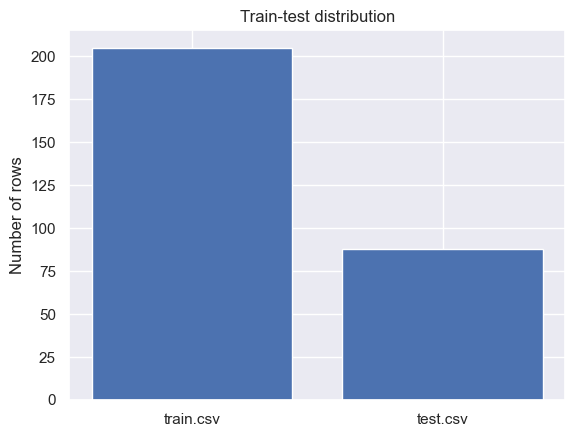

In [47]:
combined = ('train.csv', 'test.csv')

plt.bar(range(len(combined)), (training_data.shape[0], test_data.shape[0]), align='center')
plt.xticks(range(len(combined)), combined)
plt.ylabel('Number of rows') 
plt.title('Train-test distribution')
plt.show()

In [48]:
# Explore the training data

# Get one-hot encoded training data
training_data2 = load_prep_train()

# See how many times each label occurs
label_occurrances = training_data2.sum(numeric_only=True, axis=0)

# label_occurrances
# Use Data Viewer under JUPITER: VARIABLES to see the whole thing

In [49]:
print(f'There are {len(label_occurrances)} labels in total.')
print(f'Minimum times a label occurs is {min(label_occurrances)}.')
print(f'Maximum times a label occurs is {max(label_occurrances)}.')
print(f'There are {np.sum(label_occurrances < 11)} labels that occur up to 10 times.')
print(f'There are {np.sum((label_occurrances < 41) & (label_occurrances > 10))} labels that occur 11-40 times.')
print(f'There are {np.sum((label_occurrances < 81) & (label_occurrances > 40))} labels that occur 41-80 times.')

# It seems like people and trees dominate as labels, other labels occur under 40 times.

There are 92 labels in total.
Minimum times a label occurs is 2.
Maximum times a label occurs is 80.
There are 72 labels that occur up to 10 times.
There are 18 labels that occur 11-40 times.
There are 2 labels that occur 41-80 times.


In [50]:
# Labels' names to list

label_names = []
for object in labels['object']:
    label_names.append(object)

#label_names

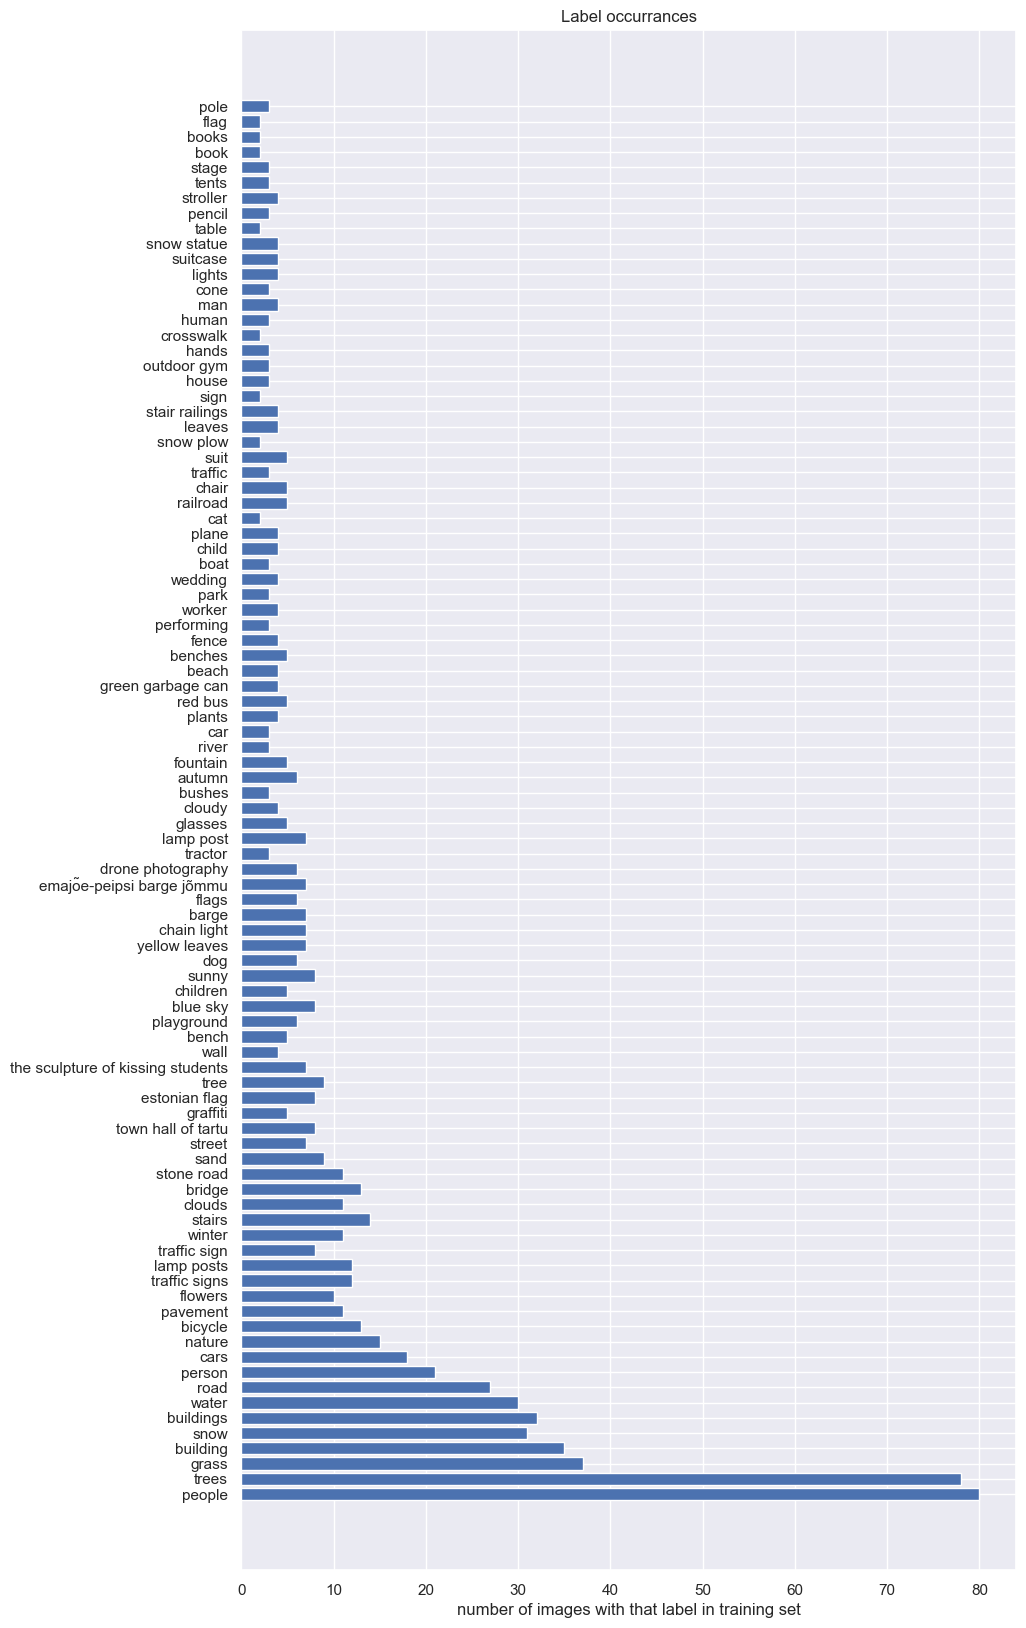

In [51]:
# Plot the occurrances
# Idea to put names to y axis from Joosep
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(label_occurrances)), label_occurrances)
plt.yticks(np.arange(len(label_names)), label_names)
plt.title('Label occurrances')
plt.xlabel('number of images with that label in training set')
plt.show()

# This plots labels on the x axis
#plt.figure(figsize=(16,8))
#plt.plot(label_occurrances)
#plt.title('Label occurrances')
#plt.ylabel('count')
#plt.xlabel('label')
#plt.show()

In [53]:
train_imgs, train_labels = load_train_images_labels()

img286.jpg doesnt exist
img172.jpg doesnt exist
img244.jpg doesnt exist
img287.jpg doesnt exist


In [64]:
w, h = train_imgs[0].size
print('width: ', w)
print('height:', h)

width:  450
height: 600


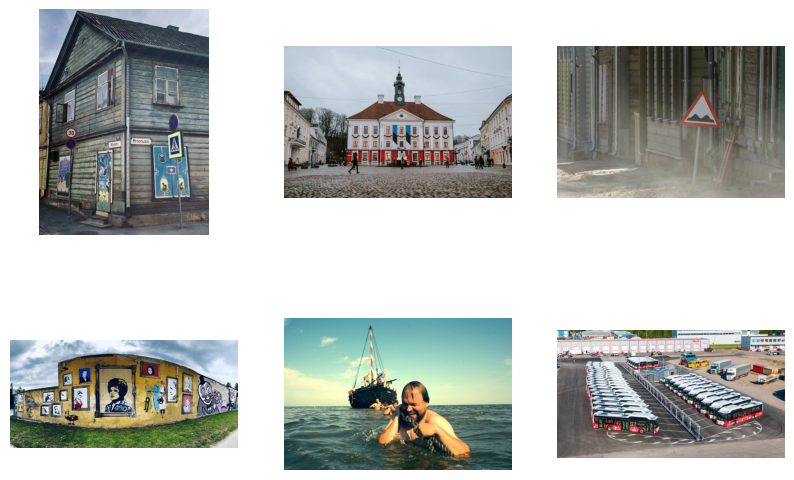

In [77]:
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_imgs[i])
    plt.axis("off")
plt.show()

In [70]:
train_imgs_resized = []
for image in train_imgs:
    image_resized = image.resize((300,300), PIL.Image.Resampling.LANCZOS)
    train_imgs_resized.append(image_resized)

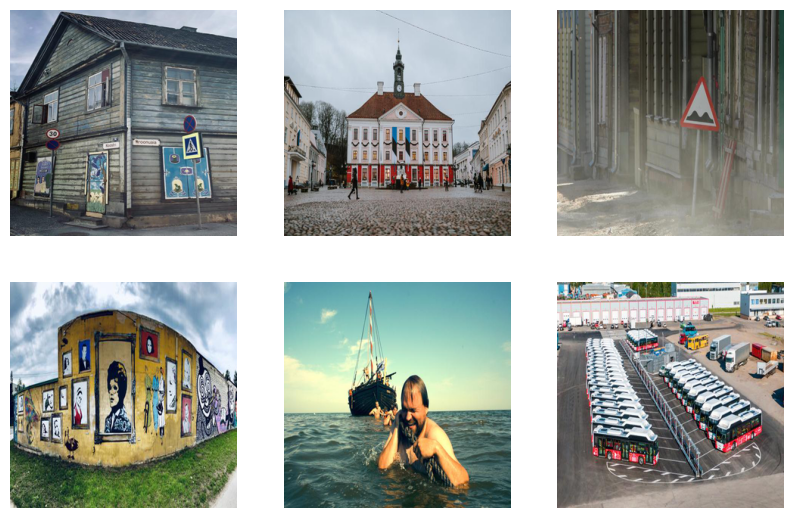

In [72]:
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_imgs_resized[i])
    plt.axis("off")

In [83]:
df = pd.read_csv('test.csv')
imgs = []

for img_id in df.image_id.values:
    # can fail
    try:
        img = PIL.Image.open(os.path.join('images', img_id))
        img.load()
        imgs.append(img)
    except FileNotFoundError:
        print(img_id, 'doesnt exist')


img285.jpg doesnt exist
img288.jpg doesnt exist
